In [5]:
'''
描述一天的天气 与 实际是否下雨
求和每种天气的分项数据
'''

import numpy as np
X = np.array([
    [0,1,0,1], #0
    [1,1,1,0], #1
    [0,1,1,0], #1
    [0,0,0,1], #0
    [0,1,1,0], #1
    [0,1,0,1], #0
    [1,0,0,1], #0
])

y = np.array([0,1,1,0,1,0,0])

counts = {}

for label in np.unique(y):
    print('label=', label)
    counts[label] = X[y == label].sum(axis=0)
    
print('feature counts:\n{}'.format(counts))

label= 0
label= 1
feature counts:
{0: array([1, 2, 0, 4]), 1: array([1, 3, 3, 0])}


In [10]:
'''
通过贝努利朴素贝叶斯预测下雨的情况以及概率
'''

from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf.fit(X, y)

next_day = [[0,0,1,0]]

pre = clf.predict(next_day)

if pre == [1]:
    print('下雨')
else:
    print('不下雨')

# print("得分: {:.2f}".format(clf.score(X, y)))

another_day = [[1,1,0,1]]
pre2 = clf.predict(another_day)
if pre2 == [1]:
    print('下雨')
else:
    print('不下雨')

#预测的分类概率
print(clf.predict_proba(next_day))
#预测的分类概率
print(clf.predict_proba(another_day))

下雨
不下雨
[[0.13848881 0.86151119]]
[[0.92340878 0.07659122]]


In [13]:
'''
贝努利朴素贝叶斯

适合二项分布
'''

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

X, y = make_blobs(n_samples=500, centers=5, random_state=8)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=8)

nb = BernoulliNB()
nb.fit(X_train, y_train)


print("test得分: {:.3f}".format(nb.score(X_test, y_test)))
print("train得分: {:.3f}".format(nb.score(X_train, y_train)))

test得分: 0.544
train得分: 0.499


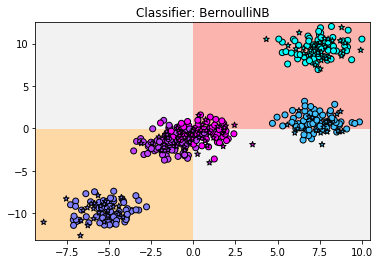

In [20]:
'''
贝努利朴素贝叶斯 图像分布
'''

import matplotlib.pyplot as plt
x_min, x_max = X[:,0].min()-0.5, X[:,0].max()+0.5
y_min, y_max = X[:,1].min()-0.5, X[:,1].max()+0.5

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
z = nb.predict(np.c_[(xx.ravel(), yy.ravel())]).reshape(xx.shape)
plt.pcolormesh(xx,yy,z,cmap=plt.cm.Pastel1)

plt.scatter(X_train[:,0],X_train[:,1], c=y_train, cmap=plt.cm.cool, edgecolors='k')
plt.scatter(X_test[:,0],X_test[:,1], c=y_test, cmap=plt.cm.cool, marker="*", edgecolors='k')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.title('Classifier: BernoulliNB')
plt.show()

In [23]:
'''
高斯朴素贝叶斯

适合数据符合正态分布的情况
'''
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)

print("test模型得分: {:.3f}".format(gnb.score(X_test, y_test)))
print("train模型得分: {:.3f}".format(gnb.score(X_train, y_train)))

test模型得分: 0.968
train模型得分: 0.939


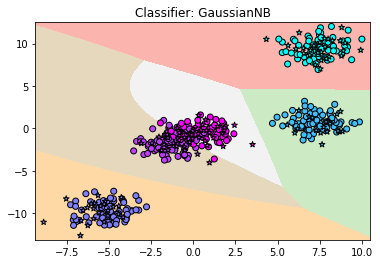

In [24]:
'''
高斯朴素贝叶斯 图像分布
'''

z = gnb.predict(np.c_[(xx.ravel(), yy.ravel())]).reshape(xx.shape)
plt.pcolormesh(xx,yy,z,cmap=plt.cm.Pastel1)
plt.scatter(X_train[:,0],X_train[:,1], c=y_train, cmap=plt.cm.cool, edgecolors='k')
plt.scatter(X_test[:,0],X_test[:,1], c=y_test, cmap=plt.cm.cool, marker="*", edgecolors='k')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.title('Classifier: GaussianNB')
plt.show()

In [29]:
'''
多项式朴素贝叶斯

并不使用来拟合这个数据集
'''

from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

#对数据进行预处理 使数据全部为非负值
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

mnb = MultinomialNB()
mnb.fit(X_train_scaled, y_train)

print("test模型得分: {:.3f}".format(mnb.score(X_test_scaled, y_test)))
print("train模型得分: {:.3f}".format(mnb.score(X_train_scaled, y_train)))

test模型得分: 0.320
train模型得分: 0.397


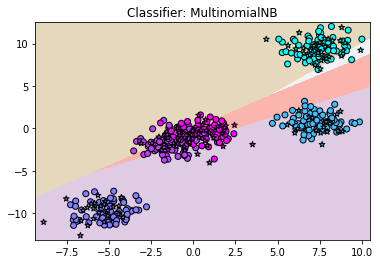

In [31]:
z = mnb.predict(np.c_[(xx.ravel(), yy.ravel())]).reshape(xx.shape)
plt.pcolormesh(xx,yy,z,cmap=plt.cm.Pastel1)
plt.scatter(X_train[:,0],X_train[:,1], c=y_train, cmap=plt.cm.cool, edgecolors='k')
plt.scatter(X_test[:,0],X_test[:,1], c=y_test, cmap=plt.cm.cool, marker="*", edgecolors='k')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.title('Classifier: MultinomialNB')
plt.show()

In [41]:
'''
判断肿瘤是良性还是恶性
'''

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
# print(cancer.keys())
# print('肿瘤分类:', cancer['target_names'])
# print('\n肿瘤分类:\n', cancer['feature_names'])

X, y = cancer.data, cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=38)

print('训练数据形态：', X_train.shape)
print('测试数据形态：', X_test.shape)
print('\n')

# 使用高斯贝叶斯拟合数据
gnb = GaussianNB()
gnb.fit(X_train, y_train)

print("test模型得分: {:.3f}".format(gnb.score(X_test, y_test)))
print("train模型得分: {:.3f}".format(gnb.score(X_train, y_train)))
print('\n')

print('模型预测的分类是：{}'.format(gnb.predict([X[312]])))
print('样本预测的分类是：{}'.format(y[312]))
print('\n')

训练数据形态： (426, 30)
测试数据形态： (143, 30)


test模型得分: 0.944
train模型得分: 0.948


模型预测的分类是：[1]
样本预测的分类是：1




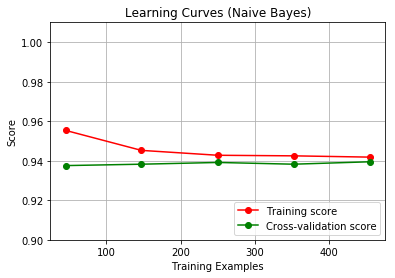

In [43]:
'''
高斯朴素贝叶斯的学习曲线
'''

from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
        
    plt.xlabel('Training Examples')
    
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    plt.grid()
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label="Cross-validation score")
    
    plt.legend(loc="lower right")
    return plt

title = "Learning Curves (Naive Bayes)"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = GaussianNB()
plot_learning_curve(estimator, title, X, y, ylim=(0.9,1.01), cv=cv, n_jobs=4)
plt.show()